# **Data Science & Business Analytics Internship at The Sparks Foundation**

## TASK 2 - Prediction using Unsupervised Machine Learning

### The aim of this task is to predict the optimum number of clusters fron the 'Iris' dataset and represent it visually

## Steps to be followed:
Step 1 - Importing the dataset
Step 2 - Finding the optimum number of clusters
Step 3 - Applying k means clustering on the data
Step 4 - Visualising the clusters

## STEP-1 Importing the data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [6]:
# Loading the iris dataset

dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [7]:
# Viewing the first 5 rows of the dataset

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## STEP-2 Finding the optimum number of clusters
Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

### **Brief about the Elbow method**
In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [14]:
# Calculating the within-cluster sum of square
x=dataset.iloc[:,[0,1,2,3]].values
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset)
    within_cluster_sum_of_square.append(km.inertia_)

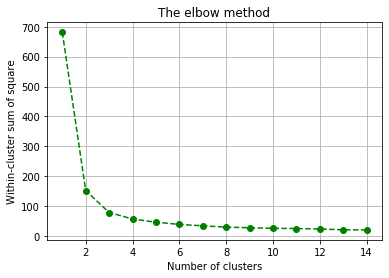

In [15]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

From this we choose the number of clusters as 3.

## Step-3 Applying k means clustering on the data

In [16]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(dataset)

## Step-4 Visualising the clusters

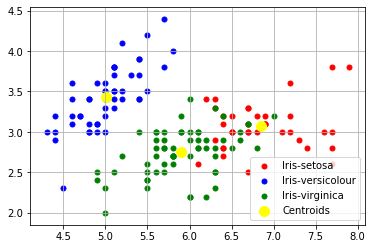

In [17]:
# Visualising the clusters - On the first two columns

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()